In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.info

<bound method DataFrame.info of     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs 

In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
duplicates = df['animal name'].value_counts()
duplicates

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [6]:
frog = df[df['animal name'] == 'frog']
frog
# Frog has more than 1 duplicate

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [7]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
df['animal name'][(df['venomous'] == 1 )& (df['animal name'] == 'frog')] = "frog2"

In [8]:
df['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

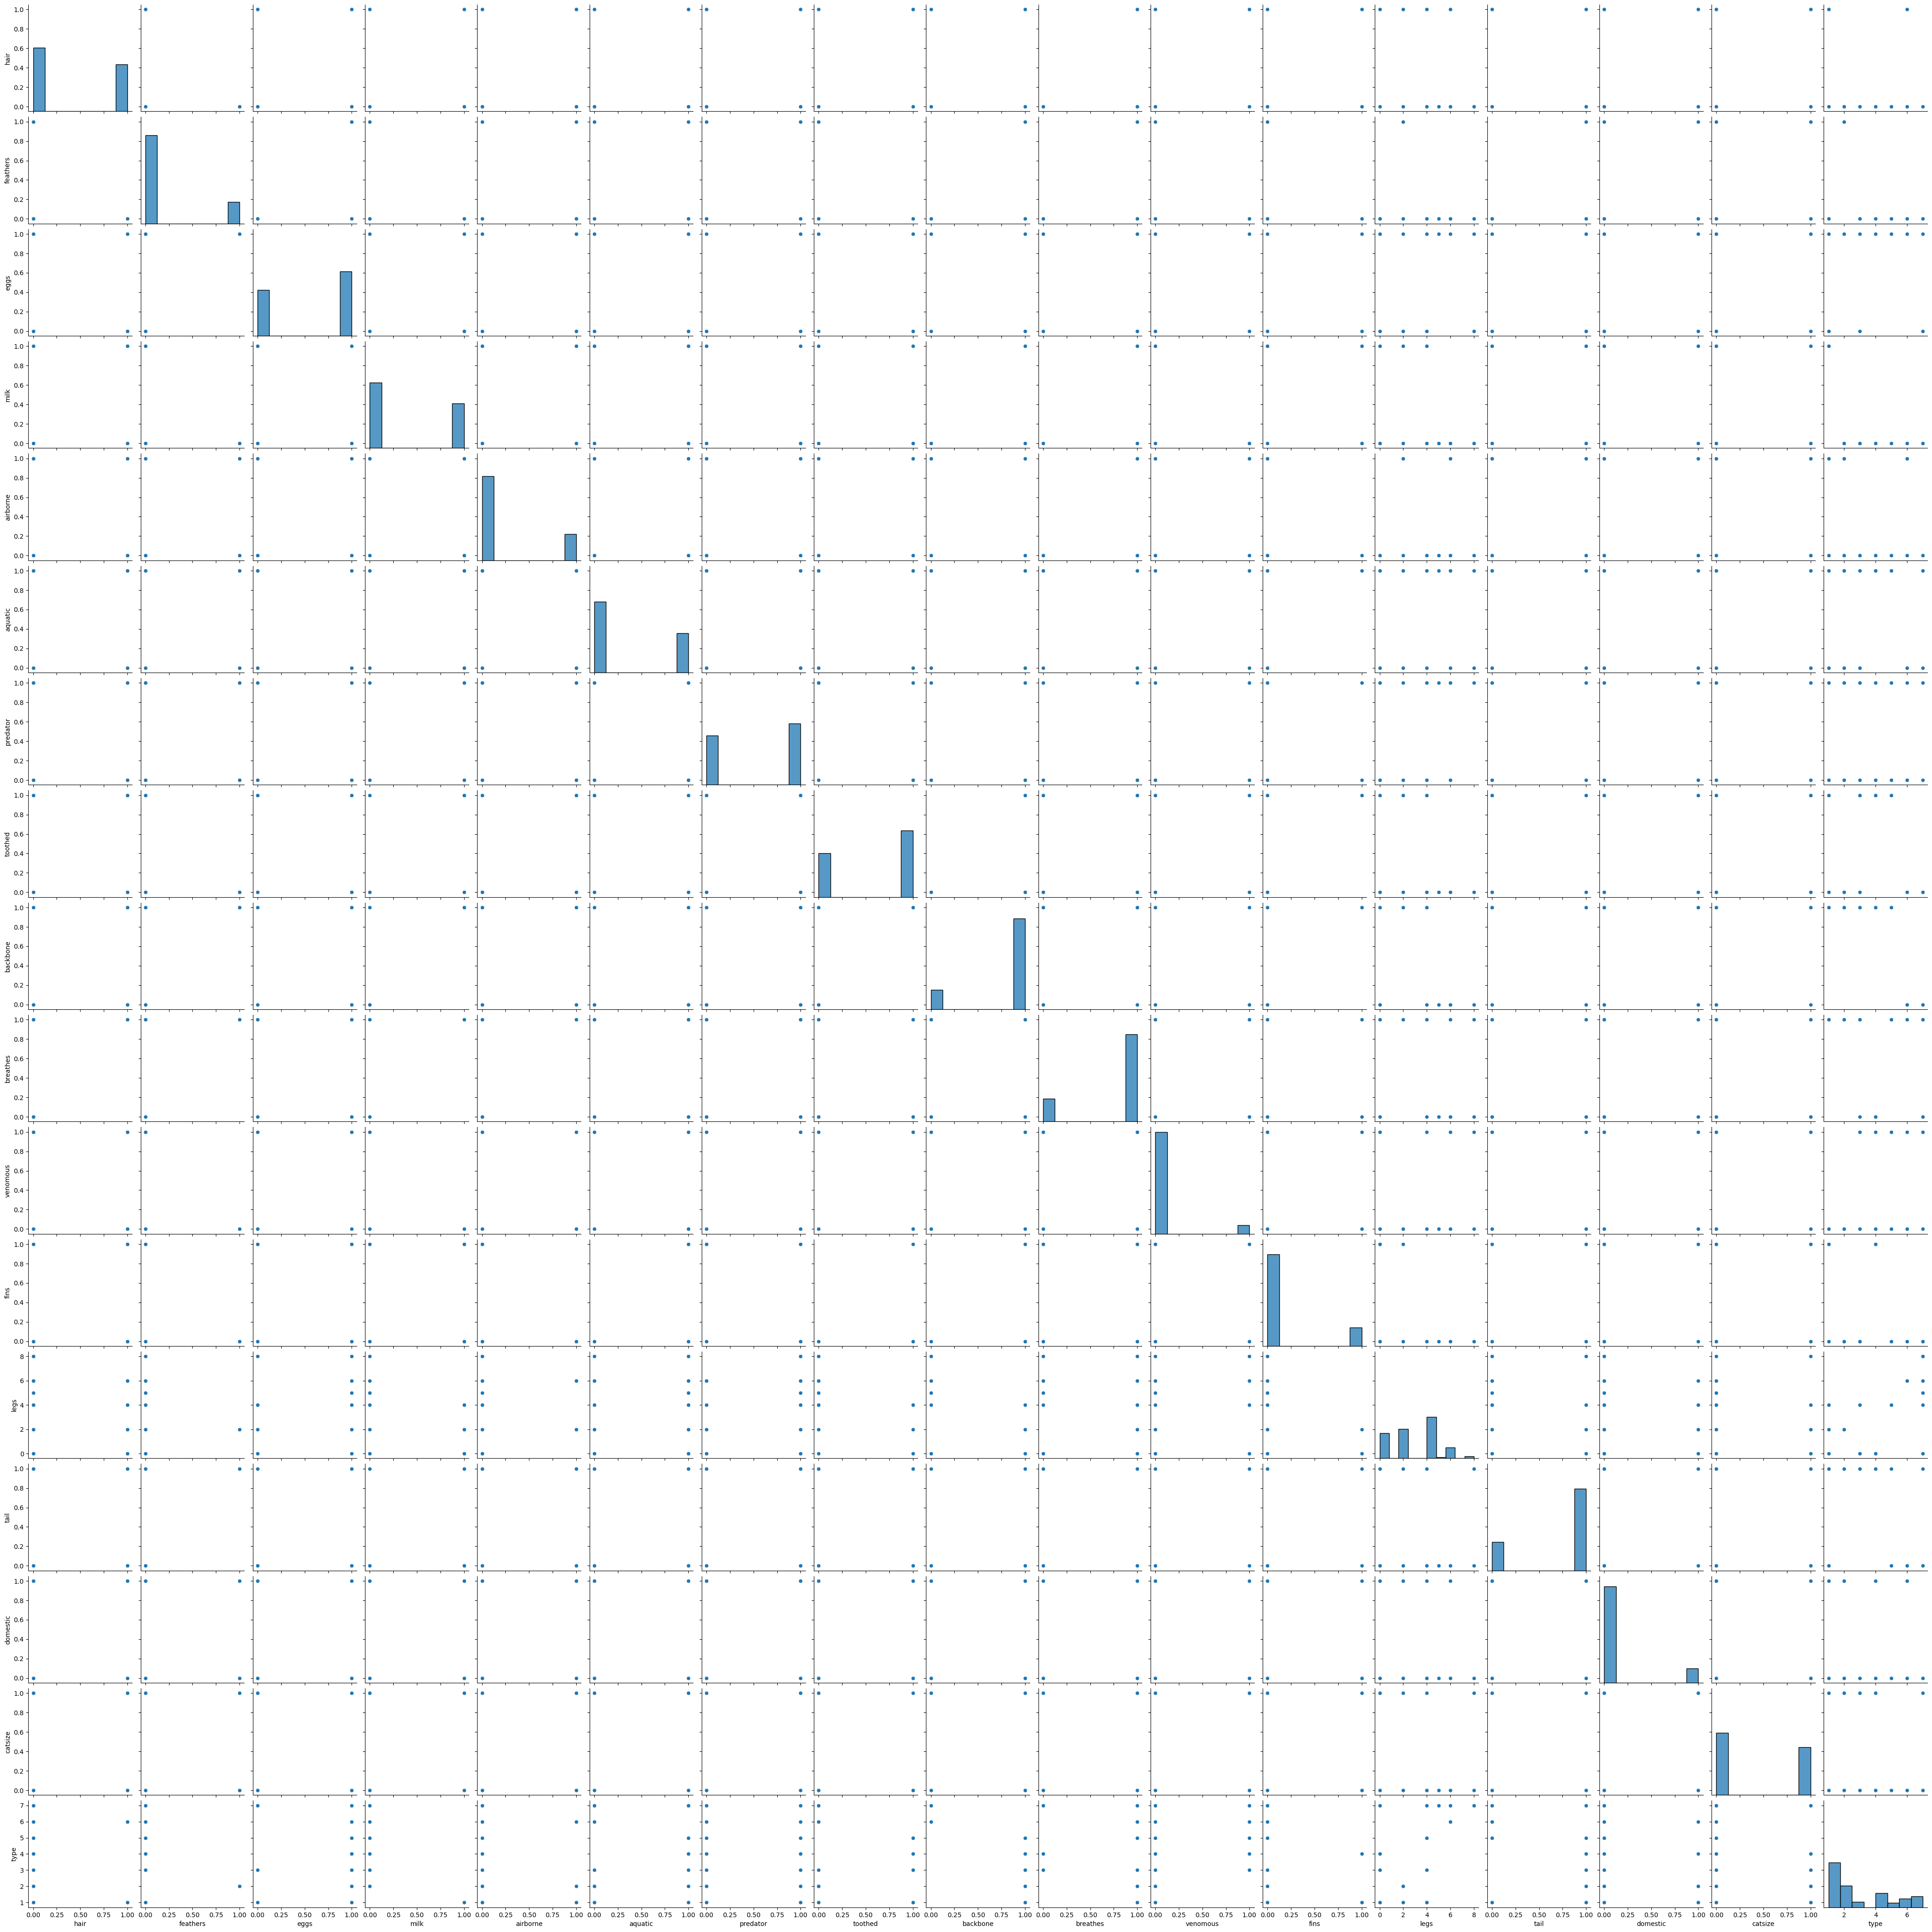

In [9]:
sns.pairplot(df)

In [10]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in df.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

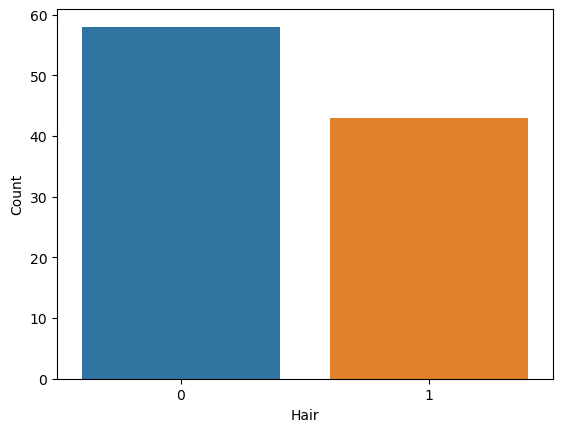

In [11]:
sns.countplot(x="hair", data=df)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()

In [12]:
#Finding the number of domestic animals
plt.figure(figsize=(10,8));
df['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

[]

In [13]:
# most of the animals are wild

In [14]:
pd.crosstab(df['type'], df['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


In [15]:
pd.crosstab(df['type'], df['domestic']).plot(kind="bar", figsize=(10, 8), title="Domestic VS Non-Domestic");
plt.plot();
# Wild vs Domestic Animals

In [16]:
# Mammal count
df['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [17]:
pd.crosstab(df['type'], df['milk']).plot(kind="bar", figsize=(10, 8), title="Mammal classification");
plt.plot();

In [18]:
# Aquatic Animals
df.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [19]:
pd.crosstab(df['type'], df['aquatic']).plot(kind="bar", figsize=(10, 8));

In [20]:
## Training the data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.iloc[:,1:16]
y = df.iloc[:,16]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [23]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
81,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0
61,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0


In [24]:
y_train

6     1
83    0
81    0
26    0
56    1
     ..
73    0
16    0
61    0
78    0
99    0
Name: catsize, Length: 70, dtype: int64

In [25]:
x_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
63,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0
40,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [26]:
y_test

46    0
32    1
86    1
17    1
63    1
40    0
10    1
39    0
71    1
98    1
23    1
82    0
20    0
57    0
42    0
54    0
35    0
28    1
59    0
12    0
70    1
95    1
50    1
22    1
34    0
24    0
13    0
64    1
72    0
37    0
88    0
Name: catsize, dtype: int64

In [27]:
from sklearn.model_selection import KFold

In [28]:
num_folds=10
kfold=KFold(n_splits=10)

In [29]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
#predicting the data

In [31]:
pred=model.predict(x_test)
pd.Series(pred)

0     0
1     1
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    0
14    0
15    1
16    1
17    1
18    0
19    1
20    1
21    0
22    1
23    1
24    1
25    0
26    0
27    1
28    0
29    0
30    0
dtype: int64

In [32]:
pd.crosstab(y_test,pred)

col_0,0,1
catsize,,
0,12,5
1,2,12


In [33]:
np.mean(pred==y_test) # Accuracy

0.7741935483870968

In [34]:
model.score(x_train,y_train)

0.7571428571428571

In [35]:
# Crossvalidation Score

In [36]:
result=cross_val_score(model, x, y, cv=kfold)
result

array([0.72727273, 0.8       , 0.9       , 0.7       , 0.9       ,
       0.6       , 1.        , 0.7       , 0.7       , 0.6       ])

In [37]:
result.mean()

0.7627272727272728

In [38]:
result.std()

0.12704199865197183

In [39]:
## Grid Search

In [40]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [41]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)

In [42]:
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [43]:
grid.best_score_

0.790952380952381

In [44]:
grid.best_params_

{'n_neighbors': 5}

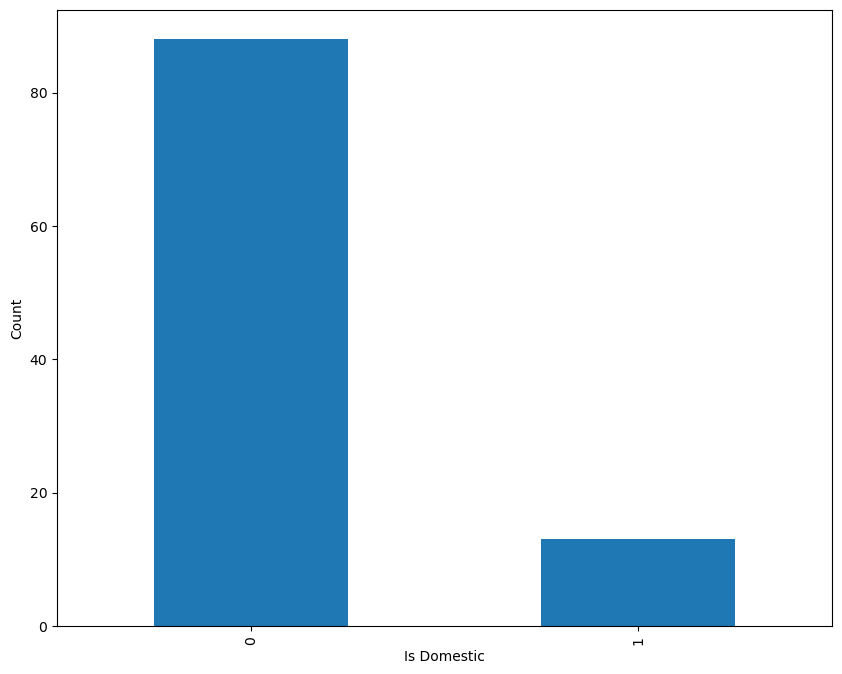

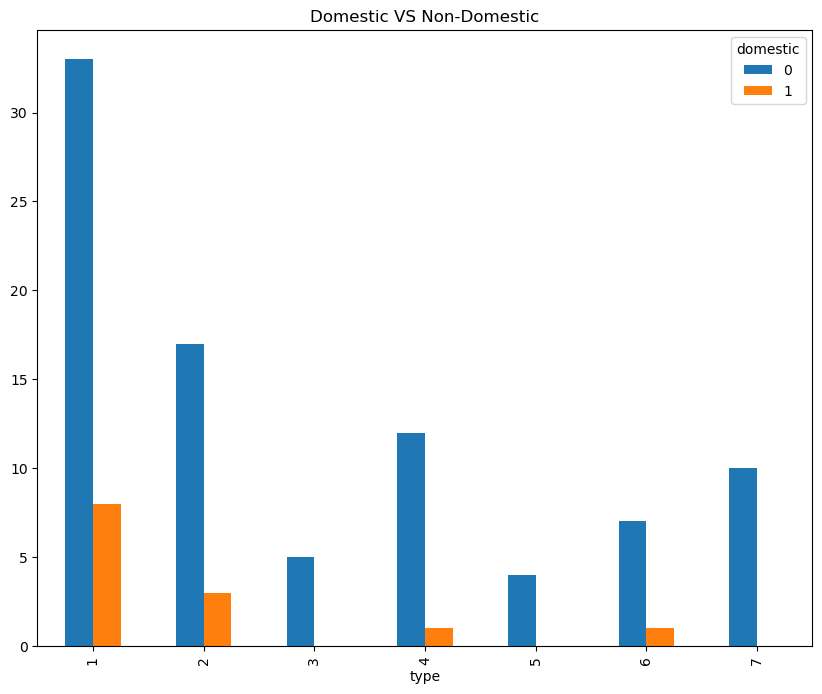

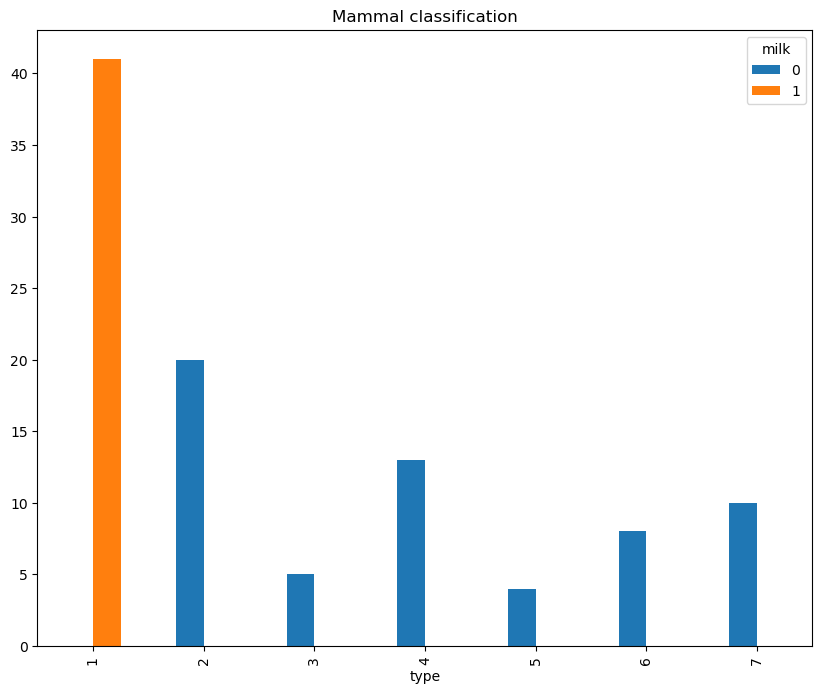

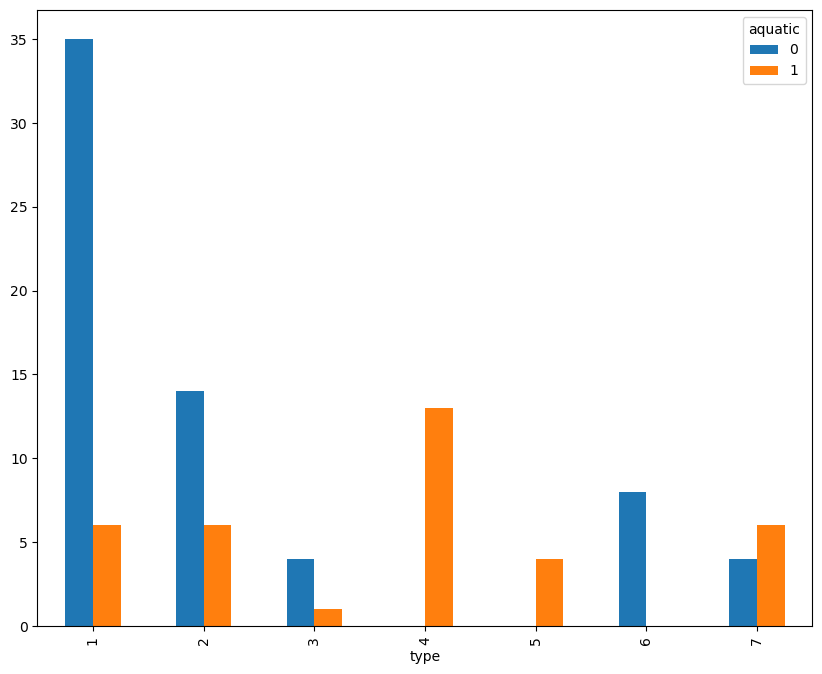

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

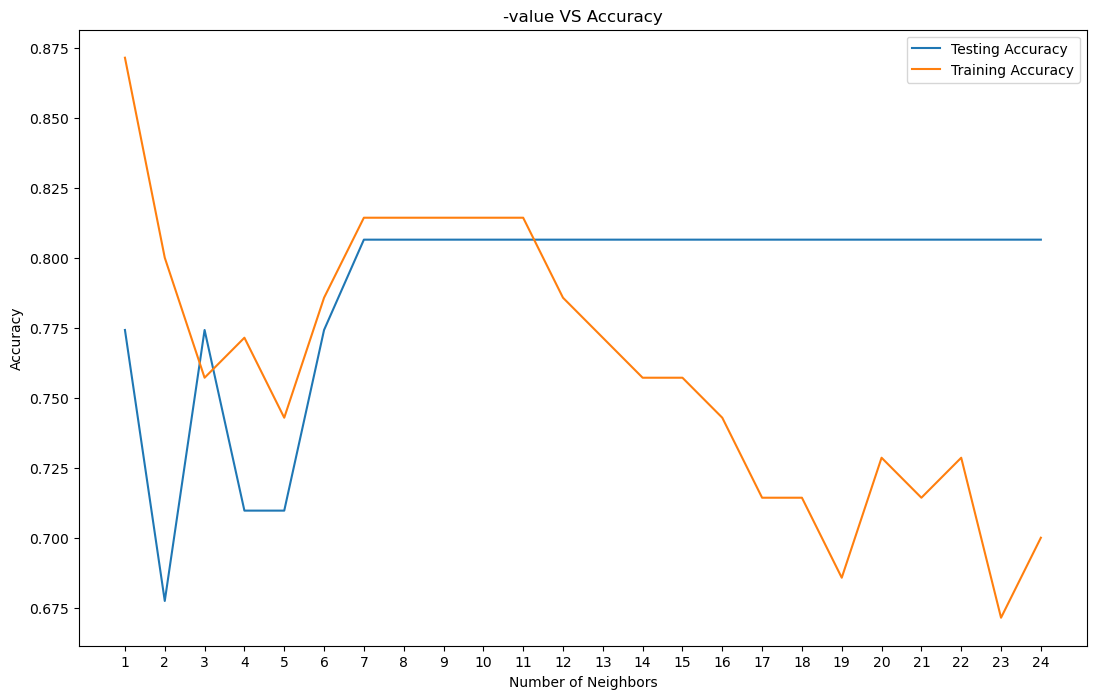

In [45]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

    plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()